Імпортуємо необхідні модулі для роботи із зображенями

In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt


Завдання оборбити зображення: 2, 6, 9, 10

Блок коді із функціями для обробки зображень

In [127]:
""" 
Модуль cv2 - працює використовуючи двохвимірні масиви, тобто коли ми відкриваємо зображення у cv2 модуль його перетворює
у один масив фотографії у якому бкзліч масивів для кожного рядка (кількість масивів - це кількість пікселів висоти зображення)
кількість чисел у одному масиві рядка - це кількість пікселів ширини зображення. Також значення масиву залежить від кольору,
тобто 1 піксель - це 1 елемент у двохвимірному масиві, та його значення це номер кольору
редагувати зображення ми будемо міняючи значення цифр у масиві, таким чином міняючи значення пікселя
""" 

def no_shadow(input_img_path, output_img_path, output_img_path_norm): # Функція щоб забрати тінь із фото

    img = cv2.imread(input_img_path, -1) # Відкриваємо зображення для модуля cv2

    rgb_planes = cv2.split(img) # получаємо список із кольорів які використовуться

    result_planes = [] # створюємо список у який будемо поміщати відредаговані дані
    result_norm_planes = [] # список у який будем поміщати відредаговані дані із більшим контрастом

    for plane in rgb_planes: # проходимось по усіх кольорах

        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8)) # получаємо "поверхневий колір" території 7 на 7 пікселів
        bg_img = cv2.medianBlur(dilated_img, 21) # получаємо "колір заднього фону"
        diff_img = 255 - cv2.absdiff(plane, bg_img) # зрівнюємо кольори із сусідами та виправляємо їх освітлюючи
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1) # нормалізуємо зображення додавши додаткові фільтри
        result_planes.append(diff_img) # додаємо значення пікселів у масив із безфільтровою обробкою
        result_norm_planes.append(norm_img) #  додаємо значення пікселів у контрасний масив

    result = cv2.merge(result_planes) # перетворюжмо масиви пікселів у фото
    result_norm = cv2.merge(result_norm_planes) # для обох випадків

    cv2.imwrite(output_img_path, result) # зберігяємо визначене зображення за визначеним шляхои
    cv2.imwrite(output_img_path_norm, result_norm) # та для другого випадку


def gray(input_img_path, output_img_path): # Функція для перетворення зображення у сірий колір
    
    originalImage = cv2.imread(input_img_path) # Відкриваємо зображення
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY) # Задаємо чоро-білий фільтр
    
    #cv2.imshow('Original image',originalImage) # дамонстрація оригінального зображення
    #cv2.imshow('Gray image', grayImage) # демонстрація обробленого зображення
    
    #cv2.waitKey(0) # цикл щоб зображення самі не закривались
    #cv2.destroyAllWindows() # перевірка для закритя усіх виведених вікон
    cv2.imwrite(output_img_path, grayImage) # Зберігаємо фото


def black_and_white(input_img_path, output_img_path, coefficient): # функція для коректування чорного та білого
    
    originalImage = cv2.imread(input_img_path) # відкриваємо
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY) # Задаємо чоро-білий фільтр
    
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, coefficient, 255, cv2.THRESH_BINARY) # обробляємо чорно-біле фото
    # та задаємо коефіцієнт чорного, де 0 - зображення біле, 255 - чорне зображення
    
    #cv2.imshow('Black white image', blackAndWhiteImage)
    #cv2.imshow('Original image',originalImage)
    #cv2.imshow('Gray image', grayImage)
    
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    cv2.imwrite(output_img_path, blackAndWhiteImage)


def no_grain(input_img_path, output_img_path): # функція щоб позбавитись зернистості на фото
    img = cv2.imread(input_img_path,0) # відкриваєо фото
    blur = cv2.GaussianBlur(img,(13,13),0) # зміщуємо та розмазуємо пікселі
    thresh = cv2.threshold(blur, 117, 255, cv2.THRESH_BINARY)[1] # задаємо фільтр

    #cv2.imshow('original', img)
    #cv2.imshow('output', thresh)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    cv2.imwrite(output_img_path, thresh)


def reversed_image(input_img_path, output_img_path): # Функція щоб замінити колора в зображенні на протилежні

    image = cv2.imread(input_img_path) 
    invert = cv2.bitwise_not(image) # замінюємо значення у масивах на протилежні
    cv2.imwrite(output_img_path, invert)


def not_vertical(input_img_path, output_img_path): # Функція щоб позбутись вертикальних ліній

    image = cv2.imread(input_img_path) 
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # накладаємо сірий фільтр
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] # задаємо поріг ліній

    # Знімінюємо горизонтальні лінії
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5)) # шукаємо горизонтальні лінії, висотою 5 пікселів та провіряємо шириною 1 піксель
    detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2) # Знайдені лінії
    cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # шукаємо контури до яких прилягають ліії
    cnts = cnts[0] if len(cnts) == 2 else cnts[1] # перевірка чи лінія не стикуєстя із контурами
    for c in cnts:
        cv2.drawContours(image, [c], -1, (255,255,255), 2) # заміняємо значення

    # Repair image
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6)) # Повертамо зобаження у нормальний вид
    result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1) # фінальна версія зображення

    #cv2.imshow('thresh', thresh)
    #cv2.imshow('detected_lines', detected_lines)
    #cv2.imshow('image', image)
    #cv2.imshow('result', result)
    #cv2.waitKey()
    cv2.imwrite(output_img_path, result) # зберігаємо його
    

зображення 2

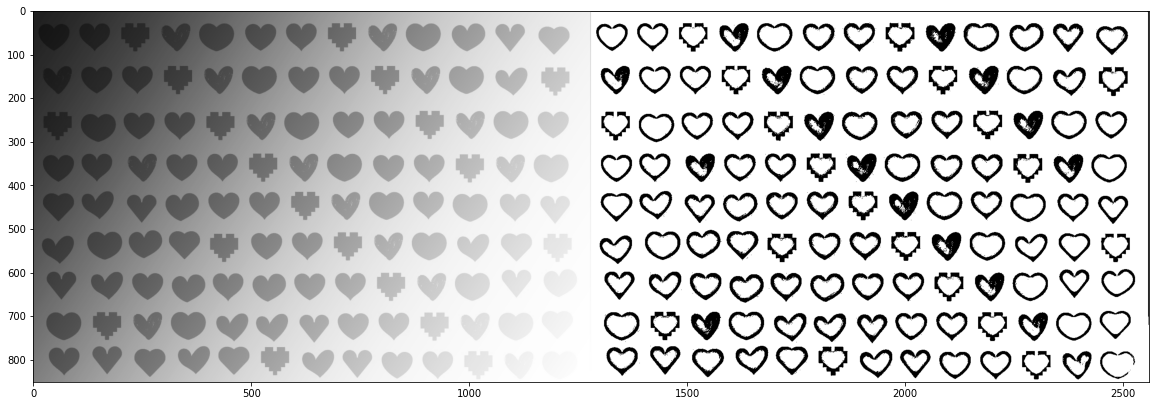

In [128]:
image2 = r"images/start/hearts 2.png" # відкриваємо друге зображення за шляхом

no_shadow(image2, r"images/no_shadow_2.jpg", r"images/no_shadow_2_norm.jpg") # забираємо у нього тіні та зберігаємо копії
black_and_white(r"images/no_shadow_2_norm.jpg", r"images/result/result_2.png", 240) # Наложуємо чорний фільтр на зображення
img_2 = cv2.imread(r"images/start/hearts 2.png")
img_2_final = cv2.imread(r"images/result/result_2.png")
plt.figure(figsize=(20, 10))
plt.imshow(np.concatenate([img_2, img_2_final], axis=1))

Зображення 6

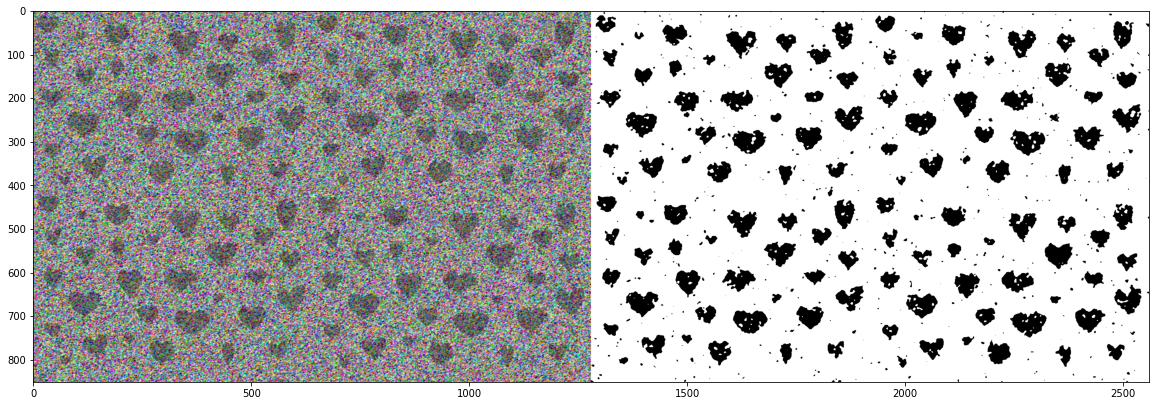

In [129]:
image6 = r"images/start/hearts 6.png"

no_grain(image6, r"images/result/result_6.png") # забираємо зернистість у фото

img_6 = cv2.imread(r"images/start/hearts 6.png")
img_6_final = cv2.imread(r"images/result/result_6.png")
plt.figure(figsize=(20, 10))
plt.imshow(np.concatenate([img_6, img_6_final], axis=1))


Зображення 9

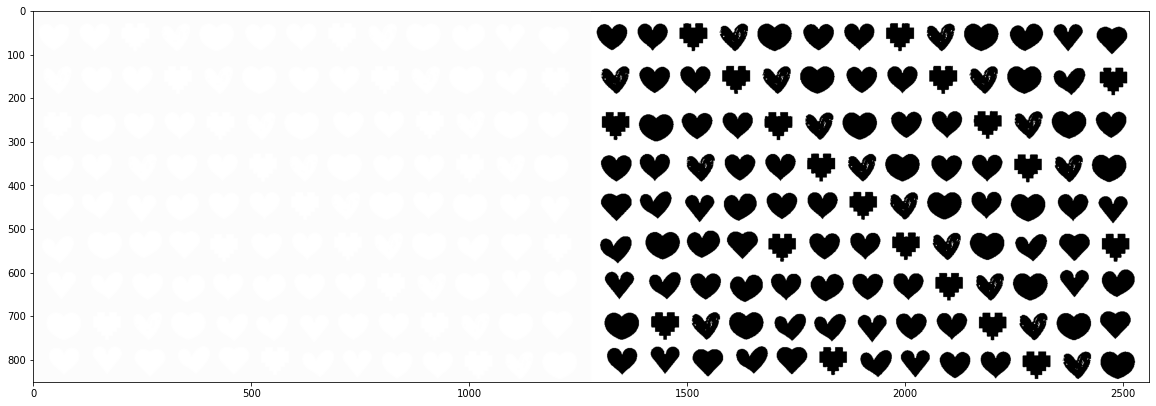

In [130]:
image9 = r"images/start/hearts 9.png"

black_and_white(image9, r"images/result/result_9.png", 254) # перетворюємо зображення у чорно-біле
reversed_image(r"images/result/result_9.png", r"images/result/result_9.png") # меняємо чорні і білі пікселі місцями

img_9 = cv2.imread(r"images/start/hearts 9.png")
img_9_final = cv2.imread(r"images/result/result_9.png")
plt.figure(figsize=(20, 10))
plt.imshow(np.concatenate([img_9, img_9_final], axis=1))

Зображення 10

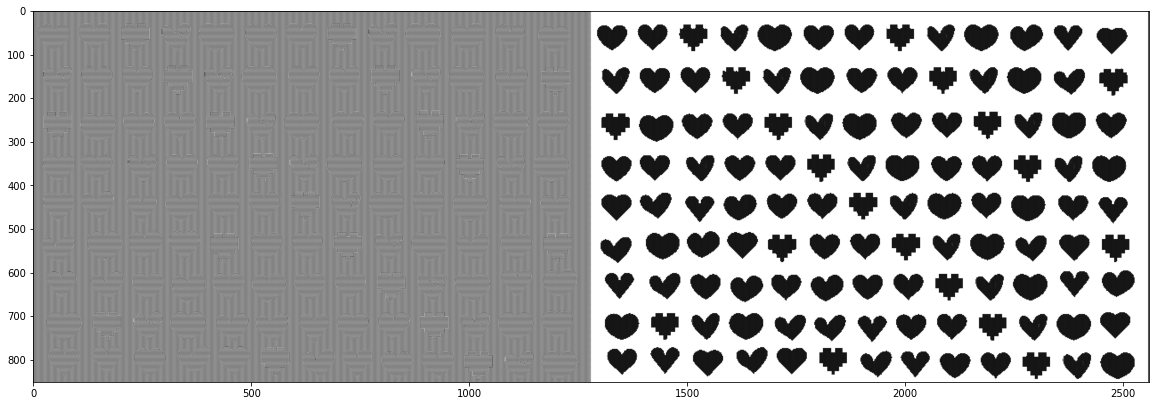

In [131]:
image10 = r"images/start/hearts 10.png"

not_vertical(image10, r"images/result/result_10.png") # Забираємо вертикальні лінії

img_10 = cv2.imread(r"images/start/hearts 10.png")
img_10_final = cv2.imread(r"images/result/result_10.png")
plt.figure(figsize=(20, 10))
plt.imshow(np.concatenate([img_10, img_10_final], axis=1))